<a href="https://colab.research.google.com/github/ToluPaul/Fifa-22_analysis/blob/main/Fifa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import the needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from statsmodels.formula.api import ols

In [2]:
#show the first five columns of the dataset
p21 = pd.read_csv("/content/players_21.csv")
display(p21.head())

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,103500000.0,560000.0,33,...,52+3,52+3,52+3,62+3,19+3,https://cdn.sofifa.net/players/158/023/21_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",92,92,63000000.0,220000.0,35,...,54+3,54+3,54+3,61+3,20+3,https://cdn.sofifa.net/players/020/801/21_120.png,https://cdn.sofifa.net/teams/45/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
2,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,91,91,111000000.0,240000.0,31,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/21_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,NaN,https://cdn.sofifa.net/flags/pl.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,132000000.0,270000.0,28,...,49+3,49+3,49+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/21_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CAM, CM",91,91,129000000.0,370000.0,29,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/21_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [3]:
#display the number of rows and columns and the columns in the dataset
print('The number of rows and columns is {}'.format(p21.shape))
print('')
display(p21.columns)

The number of rows and columns is (7274, 110)



Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)

In [4]:
#identify useful columns in the dataset and what the url columns entails
p21[['player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url']].head()

,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,https://cdn.sofifa.net/players/158/023/21_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,https://cdn.sofifa.net/players/020/801/21_120.png,https://cdn.sofifa.net/teams/45/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
2,https://cdn.sofifa.net/players/188/545/21_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,NaN,https://cdn.sofifa.net/flags/pl.png
3,https://cdn.sofifa.net/players/190/871/21_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,https://cdn.sofifa.net/players/192/985/21_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [5]:
#drop the url columns because it wont be needed for analysis
p21_clean = p21.drop(['player_face_url', 'player_url','club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url', 'long_name'], axis = 1)
display(len(p21_clean.columns))

103

In [6]:
#check the properties of the column
for k, i  in p21_clean.dtypes.iteritems():
  print(k,':', i)

sofifa_id : int64
short_name : object
player_positions : object
overall : int64
potential : int64
value_eur : float64
wage_eur : float64
age : int64
dob : object
height_cm : int64
weight_kg : int64
club_team_id : float64
club_name : object
league_name : object
league_level : float64
club_position : object
club_jersey_number : float64
club_loaned_from : object
club_joined : object
club_contract_valid_until : float64
nationality_id : int64
nationality_name : object
nation_team_id : float64
nation_position : object
nation_jersey_number : float64
preferred_foot : object
weak_foot : int64
skill_moves : int64
international_reputation : int64
work_rate : object
body_type : object
real_face : object
release_clause_eur : float64
player_tags : object
player_traits : object
pace : float64
shooting : float64
passing : float64
dribbling : float64
defending : float64
physic : float64
attacking_crossing : float64
attacking_finishing : float64
attacking_heading_accuracy : float64
attacking_short_passi

<ipython-input-6-1bfce4596f89>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for k, i  in p21_clean.dtypes.iteritems():


In [7]:
#check the league_level and dob columns
p21_clean[['dob', 'league_level']]

,dob,league_level
0,1987-06-24,1.0
1,1985-02-05,1.0
2,1988-08-21,1.0
3,1992-02-05,1.0
4,1991-06-28,1.0
...,...,...
7269,2001-08-01,1.0
7270,1988-04-03,1.0
7271,2001-05-12,1.0
7272,1997-05-26,1.0


In [8]:
#change dob to datetime object and any column that ends with id to a category datatype
p21_clean['dob'] = pd.to_datetime(p21_clean['dob'])
p21_clean['league_level'] = p21_clean['league_level'].astype('category')
for i in p21_clean.dtypes.keys():
    if '_id' in i:
      p21_clean[i] = p21_clean[i].astype('category')
    else:
      p21_clean[i] = p21_clean[i]
for k, i  in p21_clean.dtypes.iteritems():
  print(k,':', i)

sofifa_id : category
short_name : object
player_positions : object
overall : int64
potential : int64
value_eur : float64
wage_eur : float64
age : int64
dob : datetime64[ns]
height_cm : int64
weight_kg : int64
club_team_id : category
club_name : object
league_name : object
league_level : category
club_position : object
club_jersey_number : float64
club_loaned_from : object
club_joined : object
club_contract_valid_until : float64
nationality_id : category
nationality_name : object
nation_team_id : category
nation_position : object
nation_jersey_number : float64
preferred_foot : object
weak_foot : int64
skill_moves : int64
international_reputation : int64
work_rate : object
body_type : object
real_face : object
release_clause_eur : float64
player_tags : object
player_traits : object
pace : float64
shooting : float64
passing : float64
dribbling : float64
defending : float64
physic : float64
attacking_crossing : float64
attacking_finishing : float64
attacking_heading_accuracy : float64
atta

<ipython-input-8-be0775a030c5>:9: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for k, i  in p21_clean.dtypes.iteritems():


In [9]:
#check quick stats of the data
p21_clean.describe()

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_jersey_number,club_contract_valid_until,nation_jersey_number,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,7274.000000,7274.000000,7.129000e+03,7135.000000,7274.000000,7274.000000,7274.000000,7135.000000,7135.000000,947.000000,...,7273.000000,7273.000000,7273.000000,7273.000000,7273.000000,7273.000000,7273.000000,7273.000000,7273.000000,694.000000
mean,72.628403,75.195216,6.481299e+06,20295.346882,27.286637,181.359500,75.967831,17.844989,2022.166363,12.005280,...,66.676887,52.724048,53.020762,50.363124,16.578853,16.363674,16.189330,16.493881,16.714423,43.092219
std,4.057550,5.011863,1.167388e+07,28793.796776,4.108580,6.863291,7.121063,16.079982,1.233556,6.651151,...,9.543937,20.941210,22.617204,22.587314,18.770731,17.928561,17.454358,18.428115,19.189726,9.223386
min,68.000000,68.000000,1.300000e+05,500.000000,17.000000,156.000000,55.000000,1.000000,2020.000000,1.000000,...,12.000000,5.000000,7.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000
25%,69.000000,71.000000,1.600000e+06,6000.000000,24.000000,176.000000,71.000000,7.000000,2021.000000,6.000000,...,62.000000,34.000000,32.000000,28.000000,8.000000,8.000000,8.000000,8.000000,8.000000,37.000000
50%,72.000000,74.000000,2.600000e+06,12000.000000,27.000000,181.000000,76.000000,15.000000,2022.000000,12.000000,...,68.000000,62.000000,64.000000,60.000000,11.000000,11.000000,11.000000,11.000000,11.000000,44.000000
75%,75.000000,78.000000,6.000000e+06,24000.000000,30.000000,186.000000,81.000000,23.000000,2023.000000,18.000000,...,73.000000,70.000000,72.000000,70.000000,14.000000,14.000000,14.000000,14.000000,14.000000,49.000000
max,93.000000,95.000000,1.855000e+08,560000.000000,42.000000,203.000000,104.000000,99.000000,2028.000000,27.000000,...,96.000000,94.000000,93.000000,90.000000,90.000000,92.000000,93.000000,91.000000,90.000000,65.000000


In [10]:
#check for columns with null values
display(p21_clean.isnull().values.any())
#p21_clean_null_columns = p21_clean[p21_clean.isnull() > 0].sum()
p21_clean.isna().sum() > 0
for i, k in p21_clean.isna().sum().iteritems() :
    if  k > 0:
      print(i, ':' ,k)

True

value_eur : 145
wage_eur : 139
club_team_id : 139
club_name : 139
league_name : 139
league_level : 139
club_position : 139
club_jersey_number : 139
club_loaned_from : 6991
club_joined : 422
club_contract_valid_until : 139
nation_team_id : 6327
nation_position : 6327
nation_jersey_number : 6327
release_clause_eur : 428
player_tags : 6220
player_traits : 2183
pace : 695
shooting : 695
passing : 695
dribbling : 695
defending : 695
physic : 695
attacking_crossing : 1
attacking_finishing : 1
attacking_heading_accuracy : 1
attacking_short_passing : 1
attacking_volleys : 1
skill_dribbling : 1
skill_curve : 1
skill_fk_accuracy : 1
skill_long_passing : 1
skill_ball_control : 1
movement_acceleration : 1
movement_sprint_speed : 1
movement_agility : 1
movement_reactions : 1
movement_balance : 1
power_shot_power : 1
power_jumping : 1
power_stamina : 1
power_strength : 1
power_long_shots : 1
mentality_aggression : 1
mentality_interceptions : 1
mentality_positioning : 1
mentality_vision : 1
mentality

<ipython-input-10-e92e18c5790d>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, k in p21_clean.isna().sum().iteritems() :


In [12]:
p21[p21['goalkeeping_speed'].isna()]

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,103500000.0,560000.0,33,...,52+3,52+3,52+3,62+3,19+3,https://cdn.sofifa.net/players/158/023/21_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",92,92,63000000.0,220000.0,35,...,54+3,54+3,54+3,61+3,20+3,https://cdn.sofifa.net/players/020/801/21_120.png,https://cdn.sofifa.net/teams/45/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
2,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,91,91,111000000.0,240000.0,31,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/21_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,NaN,https://cdn.sofifa.net/flags/pl.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,132000000.0,270000.0,28,...,49+3,49+3,49+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/21_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CAM, CM",91,91,129000000.0,370000.0,29,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/21_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7269,252865,https://sofifa.com/player/252865/iker-losada-a...,Iker Losada,Iker Losada Aragunde,"ST, CF",68,81,2800000.0,4000.0,18,...,43+2,43+2,43+2,46+2,16+2,https://cdn.sofifa.net/players/252/865/21_120.png,https://cdn.sofifa.net/teams/450/60.png,https://cdn.sofifa.net/flags/es.png,NaN,https://cdn.sofifa.net/flags/es.png
7270,253045,https://sofifa.com/player/253045/christian-flo...,C. Flores,Christian Leonardo Flores Calderón,LM,68,68,950000.0,500.0,32,...,41+2,41+2,41+2,48+2,17+2,https://cdn.sofifa.net/players/253/045/21_120.png,https://cdn.sofifa.net/teams/111332/60.png,https://cdn.sofifa.net/flags/ve.png,NaN,https://cdn.sofifa.net/flags/ve.png
7271,253052,https://sofifa.com/player/253052/issa-kabore/2...,I. Kabore,Issa Kaboré,RB,68,83,2700000.0,18000.0,19,...,63+2,63+2,63+2,66+2,17+2,https://cdn.sofifa.net/players/253/052/21_120.png,https://cdn.sofifa.net/teams/110724/60.png,https://cdn.sofifa.net/flags/be.png,NaN,https://cdn.sofifa.net/flags/bf.png
7272,253073,https://sofifa.com/player/253073/joseph-okumu/...,J. Okumu,Joseph Stanley Okumu,CB,68,76,2500000.0,2000.0,23,...,68+2,68+2,68+2,65+2,16+2,https://cdn.sofifa.net/players/253/073/21_120.png,https://cdn.sofifa.net/teams/700/60.png,https://cdn.sofifa.net/flags/se.png,NaN,https://cdn.sofifa.net/flags/ke.png


In [13]:
#drop columns with missing values above 10,000 and 'club_joined'
p21_deep_clean = p21_clean.drop(['club_loaned_from','nation_team_id','nation_position','club_joined',
                                 'nation_jersey_number', 'player_tags','player_traits',
                                 ], axis = 1)
#drop rows with missing values on league_level and physic and fill the null values of wage value
#... value and goalkeeping_speed with 0(not all playeres are goalkeepers)
p21_deep_clean = p21_deep_clean.dropna(subset = ['league_level', 'physic']).fillna(
    {'release_clause_eur':0, 'value_eur':0, 'goalkeeping_speed' : 0})
print('Is there any missing value?')
print('')
print('Answer : {}'.format(p21_deep_clean.isnull().values.any()))

Is there any missing value?

Answer : False


In [14]:
#check quick summary statistics
p21_deep_clean.describe()

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_jersey_number,club_contract_valid_until,weak_foot,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,6456.000000,6456.000000,6.456000e+03,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,...,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,6456.0
mean,72.576363,75.229089,6.579002e+06,20713.351921,27.027571,180.557156,75.178439,17.949814,2022.173327,3.122057,...,68.377788,56.519672,57.039963,54.122057,10.579926,10.656444,10.638786,10.617410,10.585192,0.0
std,4.008518,5.027210,1.165186e+07,29165.006259,3.996456,6.547815,6.783477,15.636824,1.236111,0.689168,...,7.380020,18.083246,19.780091,20.251822,3.364478,3.360314,3.420620,3.391542,3.338974,0.0
min,68.000000,68.000000,0.000000e+00,500.000000,17.000000,156.000000,55.000000,2.000000,2020.000000,1.000000,...,46.000000,10.000000,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0
25%,69.000000,71.000000,1.600000e+06,6000.000000,24.000000,176.000000,70.000000,8.000000,2021.000000,3.000000,...,64.000000,41.000000,39.000000,34.750000,8.000000,8.000000,8.000000,8.000000,8.000000,0.0
50%,72.000000,75.000000,2.700000e+06,12000.000000,27.000000,180.000000,75.000000,15.000000,2022.000000,3.000000,...,68.000000,64.000000,66.000000,64.000000,11.000000,11.000000,11.000000,10.000000,11.000000,0.0
75%,75.000000,79.000000,6.000000e+06,24000.000000,30.000000,185.000000,80.000000,23.000000,2023.000000,4.000000,...,73.000000,70.000000,72.000000,70.000000,13.000000,13.000000,13.000000,13.000000,13.000000,0.0
max,93.000000,95.000000,1.855000e+08,560000.000000,42.000000,201.000000,104.000000,99.000000,2028.000000,5.000000,...,96.000000,94.000000,93.000000,90.000000,67.000000,75.000000,73.000000,66.000000,59.000000,0.0


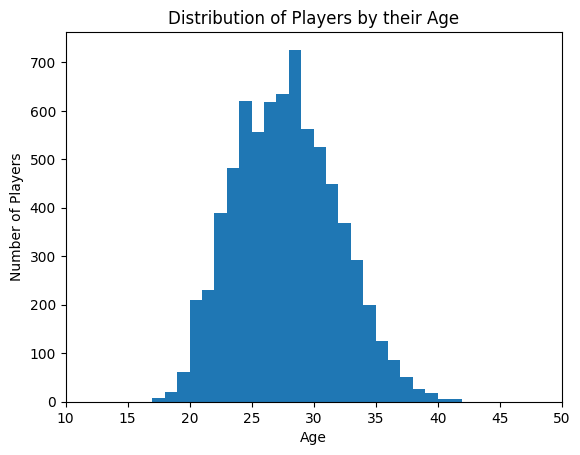

In [15]:
#check the distribution of ages
age = p21['age']
age_distribution = age.value_counts().sort_index()
plt.hist(age, bins = 25)
len = range(10,55,5)
plt.xticks(ticks =len)
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.title('Distribution of Players by their Age')
plt.show()


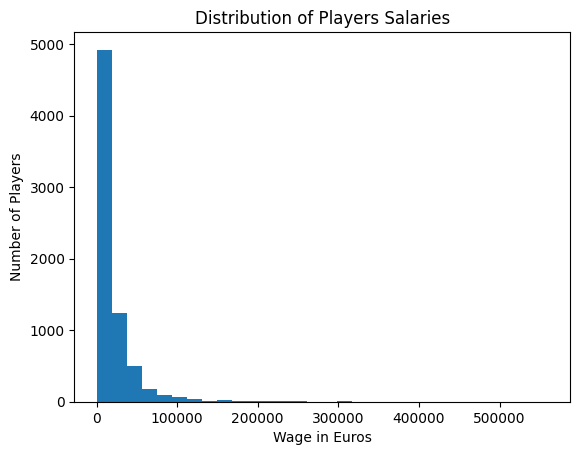

In [16]:
#check the distribution of players salary
plt.hist(p21.wage_eur.dropna(), bins = 30)
plt.xlabel('Wage in Euros')
plt.ylabel('Number of Players')
plt.title('Distribution of Players Salaries')
plt.show()

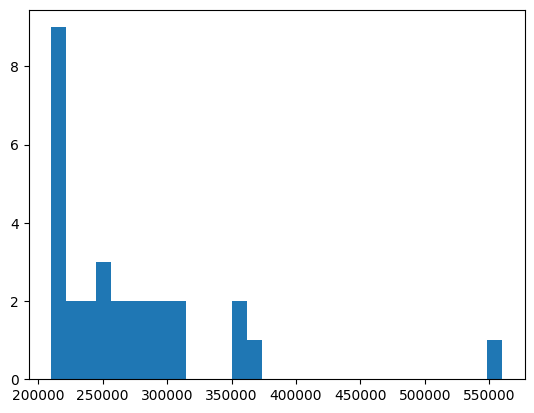

In [17]:
#check the distribution of players salary above 200,000
above_200000 = p21.loc[p21['wage_eur'] > 200000]
plt.hist(above_200000.wage_eur.dropna(), bins = 30)
plt.show()

In [18]:
#write a function that plots the distribution of salaries in a specified range
def salary_distribution(x, sign):
  ''' This function plots a graph on the distribution players wages within a given range'''
  if sign == '>' :
    above  = p21.loc[p21['wage_eur'] > x]
    plt.hist(above.wage_eur.dropna(), bins = 10)
  elif sign == '<' :
    below  = p21.loc[p21['wage_eur'] < x]
    plt.hist(below.wage_eur.dropna(), bins = 10)
  plt.xlabel('Wage in Euros')
  plt.ylabel('Number of Players')
  plt.title('Distribution of Players Salaries')
  plt.show()

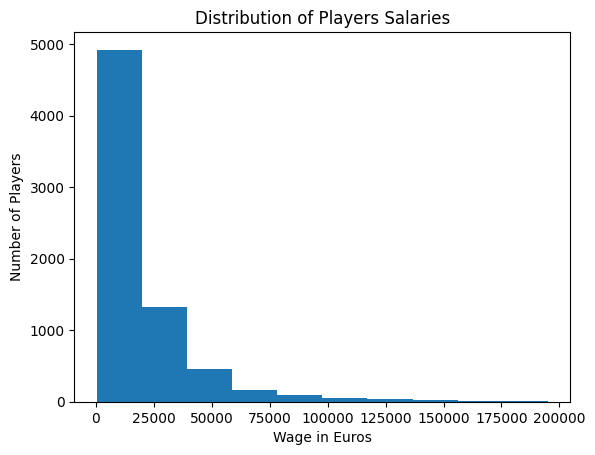

In [19]:
salary_distribution(200000, sign = '<')

In [20]:
#find the correlation between wage and potential
print(p21_deep_clean['wage_eur'].corr(p21_deep_clean['potential']))

0.5321820080256909


In [21]:
print(p21_deep_clean['wage_eur'].corr(p21_deep_clean['overall']))

0.7236933352899663


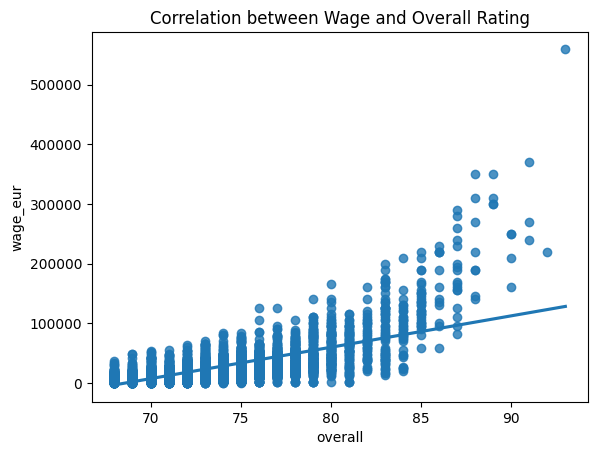

In [22]:
sns.regplot(x='overall', y = 'wage_eur', data= p21_deep_clean, ci=None)
plt.title('Correlation between Wage and Overall Rating')
plt.show()

In [23]:
print('The minimum wage is €{}'.format(p21['wage_eur'].min( )))
print('The maximum wage is €{}'.format(p21['wage_eur'].max( )))
print('The average wage is €{}'.format(p21['wage_eur'].mean()))

The minimum wage is €500.0
The maximum wage is €560000.0
The average wage is €20295.346881569727


In [24]:
top_earners = p21.sort_values('wage_eur', ascending=False)

In [25]:
print(top_earners[['short_name', 'wage_eur']].reset_index(drop=True).head(10))

     short_name  wage_eur
0      L. Messi  560000.0
1  K. De Bruyne  370000.0
2     E. Hazard  350000.0
3    K. Benzema  350000.0
4      T. Kroos  310000.0
5      Casemiro  310000.0
6     S. Agüero  300000.0
7  Sergio Ramos  300000.0
8  A. Griezmann  290000.0
9     L. Suárez  280000.0


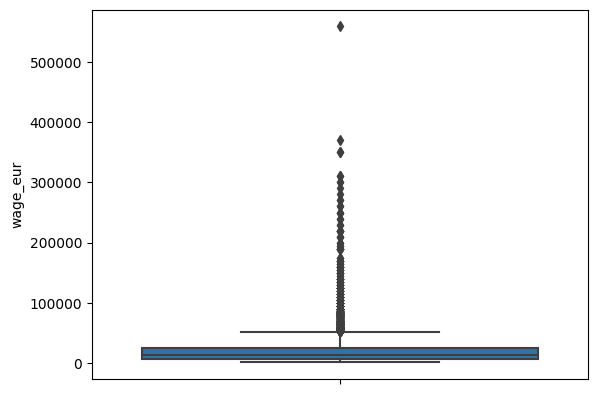

In [26]:
#check for the high earners
sns.boxplot(data = p21, y='wage_eur')
plt.show()

In [27]:
#remove the outliers
wage_array = np.array(p21_deep_clean[['wage_eur']])

In [28]:
print(wage_array)

[[5.6e+05]
 [2.2e+05]
 [2.4e+05]
 ...
 [5.0e+02]
 [1.8e+04]
 [2.0e+03]]


In [29]:
sort_wage = p21_deep_clean['wage_eur'].sort_values()
mid_sort_wage = sort_wage.median()
q75, q25 = np.percentile(p21_deep_clean['wage_eur'], [75, 25])
iqr = q75 - q25

In [30]:
print(q75, iqr)

24000.0 18000.0


In [31]:
upper_whisker = q75 + (1.5*iqr)
print(upper_whisker)

51000.0


In [32]:
no_outlier = np.where(p21_deep_clean['wage_eur'] <= upper_whisker)
outlier = np.where(p21_deep_clean['wage_eur'] > upper_whisker)
print(p21[['short_name', 'wage_eur']].loc[outlier].head())
print('')
print(p21[['short_name', 'wage_eur']].loc[no_outlier].head())

          short_name  wage_eur
0           L. Messi  560000.0
1  Cristiano Ronaldo  220000.0
2     R. Lewandowski  240000.0
3          Neymar Jr  270000.0
4       K. De Bruyne  370000.0

              short_name  wage_eur
85            Marquinhos  115000.0
90               L. Sané  100000.0
91   S. Milinković-Savić   95000.0
95                 Rodri  145000.0
106          Azpilicueta  120000.0


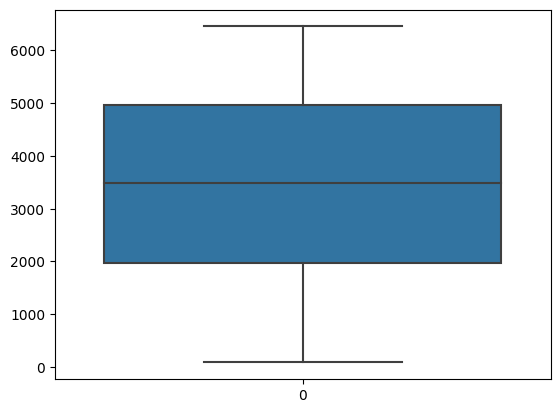

In [33]:
sns.boxplot(data = no_outlier)
plt.show()

In [34]:
len_outliers = p21[p21['wage_eur'] > upper_whisker].index.size
len_no_outliers = p21['wage_eur'].loc[no_outlier].index.size

print('The number of players who are outliers based on earning is {}'.format(len_outliers))
print('The number of players who are not outliers based on earning is {}'.format(len_no_outliers))
print('The percentage of the top paid players is {}'.format((len_outliers/(p21.index.size) * 100)))
print('')
print('The Wages of the top paid players is €{} and above'.format(upper_whisker))

The number of players who are outliers based on earning is 547
The number of players who are not outliers based on earning is 5947
The percentage of the top paid players is 7.51993401154798

The Wages of the top paid players is €51000.0 and above


In [35]:
#Check the correlation between wage and overall without outliers
print(p21['wage_eur'].loc[no_outlier].corr(p21['overall'].loc[no_outlier]))
p21_no_outlier = p21.loc[no_outlier]

0.6558853951064954


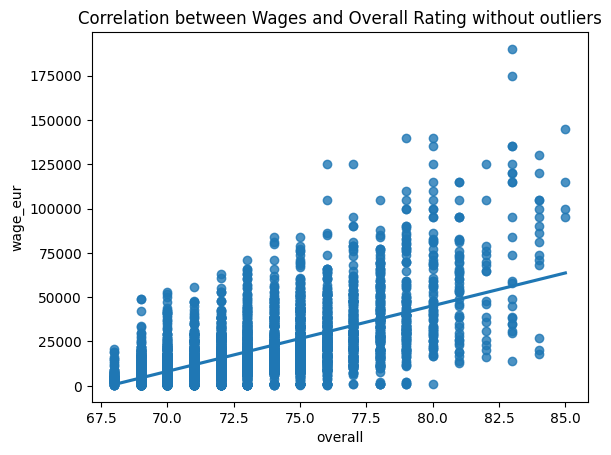

In [36]:
sns.regplot(x='overall', y = 'wage_eur', data= p21_no_outlier, ci=None)
plt.title('Correlation between Wages and Overall Rating without outliers')
plt.show()

In [37]:
np.sum([p21_deep_clean['wage_eur'] < 0])

0

In [38]:
#Instantiate a model that uses this correlation to predict the wages of a player based on their rating
wage_eur_vs_overall = ols("wage_eur ~ overall", data = p21_no_outlier)
wage_eur_vs_overall = wage_eur_vs_overall.fit()
print(wage_eur_vs_overall.params)

Intercept   -250712.957537
overall        3698.422864
dtype: float64


In [39]:
#Make a prediction of a range of values
explanatory_data = pd.DataFrame({'overall':np.arange(60,81)})
prediction_data = explanatory_data.assign(
    wage_eur = wage_eur_vs_overall.predict(explanatory_data))
print(prediction_data)

    overall      wage_eur
0        60 -28807.585713
1        61 -25109.162850
2        62 -21410.739986
3        63 -17712.317122
4        64 -14013.894259
5        65 -10315.471395
6        66  -6617.048531
7        67  -2918.625667
8        68    779.797196
9        69   4478.220060
10       70   8176.642924
11       71  11875.065787
12       72  15573.488651
13       73  19271.911515
14       74  22970.334379
15       75  26668.757242
16       76  30367.180106
17       77  34065.602970
18       78  37764.025833
19       79  41462.448697
20       80  45160.871561


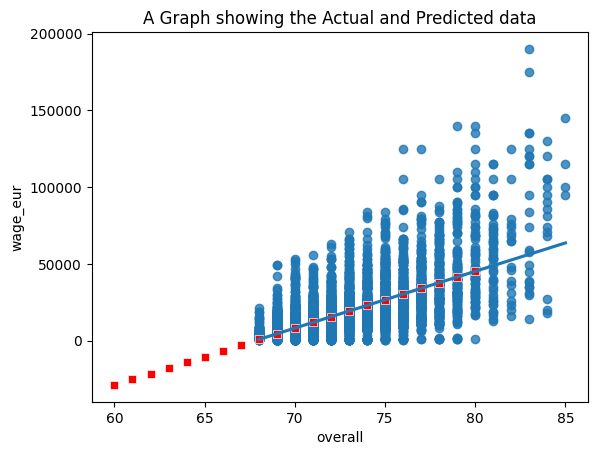

In [40]:
#Plot a graph of the original dataset and the predicted values
fig = plt.figure()
sns.regplot(x='overall', y = 'wage_eur', data= p21_no_outlier, ci=None)
sns.scatterplot(x='overall', y = 'wage_eur', data= prediction_data, color ='r', marker ='s')
plt.title('A Graph showing the Actual and Predicted data')
plt.show()

In [41]:
#comment
#Is the ols function a good option for prediction?
print('The ols function is not the best aproach as there is no such thing as a negative wage')
print('')
print('Part 2 for prediction of the dataset would be carried out...')

The ols function is not the best aproach as there is no such thing as a negative wage

Part 2 for prediction of the dataset would be carried out...
